In [32]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from tqdm import tqdm
import cmath as cmath
import scipy.optimize as opt

In [33]:
#Initialization values so I can define functions
N = 50
K = 20
h = 5
D = 2
tau = 1
tf=20
dt = 1e-3

In [34]:
#Stochastic noise process; D is a dimension parameter which we may control
def zetta(t):
    return rnd.normal(0,scale = 2*D)

In [35]:
#A function to get the solution state a given time; may be used if desired
def get_y(y,t,dt=1e-3):
    return y[int(t/dt)]

In [36]:
#Initial phases theta0s and natural frequencies omegai
theta0s = rnd.uniform(0.0,2*np.pi,size=N)
omegais = rnd.uniform(0.0,2*np.pi,size=N)

In [37]:
#Function to integrate the equation including the stochastic noise and delay
def integrate_euler(theta0s=theta0s,omegais=omegais,t0=0,tf=tf,dt=dt,tau=tau):
    print("Using K = {} N = {}\n".format(K,N))
    thetas = theta0s #Take thetas to be the initial values
    times=[] #The time array
    t=0 #We start at t=0
    times.append(t) #Add it to array
    while (t<tau): #We integrate "blindly" until tau
        thetas = np.vstack((thetas,theta0s)) #Just assume initial phases; We can do this because we want the 
        #Time evolution eventually
        t+=dt 
        times.append(t)
    t=tau #Now we start at tau
    while(t<tf-dt):
        thetas_now = thetas[-1] #Current oscillator state
        thetas_past = thetas[int((t-tau)/dt)] #State at t' = t_current - tau
        newthetas=np.zeros(shape=N) #We will store the new thetas here
        for i in range(N):
            #Advance the value step
            newthetas[i] = thetas_now[i]+(omegais[i]+zetta(t)+h*np.sin(thetas_now[i])+K/N*sum(np.sin(thetas_past[j]-thetas_now[i]) for j in range(N)))*dt
        thetas = np.vstack((thetas,newthetas)) #Now append the new thetas to the original array
        t+=dt #Advance time
        times.append(t) #And add it
    return (times,thetas) #Return a tuple containing times and thetas; thetas[i] 
                          #returns the state of the system at t[i]

In [154]:
#The parameters we use to investigate the system numerically
N = 50 #Oscillator number
K = 0.1 #Coupling strength
h = 3 #Forcing function strength
tau = 1 #Time delay
D = 4 #Noise parameter; controls noise spread
tf=30 #Up until which time we integrate
dt = 1e-2 #The time step

#--------->
#Initial values
theta0s = rnd.uniform(0.0,2*np.pi,size=N) 
omegais = rnd.uniform(0.0,2*np.pi,size=N)

In [155]:
#Get some solutions
t,y = integrate_euler(theta0s,omegais,t0=0,tf=tf,dt=dt,tau=tau)

Using K = 0.1 N = 50



In [156]:
#See if the order parameter thing still makes sense
sols = y
averages = [np.average(sols[i]) for i in range(len(sols))]
ordparams = []
for i in range(len(sols)):
    ordparams.append((1/N)*sum(cmath.exp(1j*sols[i][k]) for k in range(N)))
rs = []
for i in range(len(ordparams)):
    rs.append(cmath.polar(ordparams[i])[0])
reals = [k.real for k in ordparams]
imgs = [k.imag for k in ordparams]

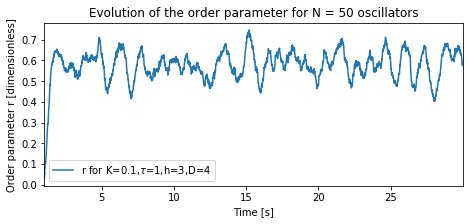

In [157]:
#Here we plot the evolution of the order parameter
fig = plt.figure(figsize=(7.5,3))
frame = fig.add_subplot()
frame.plot(t,rs,label="r for K={},$\\tau$={},h={},D={}".format(K,tau,h,D))
frame.set_xlabel("Time [s]")
frame.set_ylabel("Order parameter r [dimensionless]")
frame.set_title("Evolution of the order parameter for N = {} oscillators".format(N))
frame.legend()
frame.set_xlim(tau,max(t))
fig.savefig("C:/Users/Grigore/Documents/NPP Assignment/Trial.png")

In [18]:
#Analytical calculations

In [19]:
#Take some coupling strength and time delay
K = 3
tau = 2
N=2
h = 0
D = 0 

In [20]:
#omega1,omega2 = rnd.uniform(0,2*np.pi,size=2)
omega1,omega2 = (1.2,0.8)#Take some arbitrary natural frequencies
domega = omega1-omega2 #As defined in the paper
Kc = domega
baromega = (omega1+omega2)/2 #As defined in the paper
def func_root(Omega):
    return baromega - Omega - K/2 * np.tan(Omega*tau)*(np.cos(Omega*tau)**2-(Kc/(K))**2)**0.5
def alpha(Omega):
    if(np.cos(Omega*tau)>0):
        return np.arcsin(domega/(K*np.cos(Omega*tau)))
    else:
        return np.pi-np.arcsin(domega/(K*np.cos(Omega*tau)))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


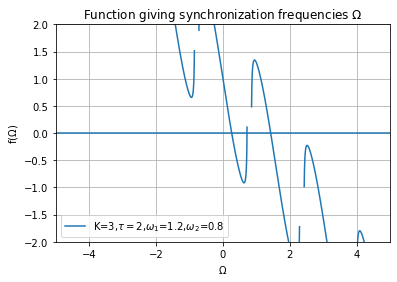

In [7]:
#Visualisation to help in finding the roots Omegai
par = np.linspace(-20,20,10000)
fig = plt.figure()
frame = fig.add_subplot(1,1,1)
frame.plot(par,func_root(par),label="K={},$\\tau={}$,$\omega_1$={},$\omega_2$={}".format(K,tau,omega1,omega2))
frame.set_xlim(-5,5)
frame.set_ylim(-2,2)
frame.axhline(0)
frame.set_xlabel("$\Omega$")
frame.set_ylabel("f($\Omega$)")
frame.set_title("Function giving synchronization frequencies $\Omega$")
frame.legend()
frame.grid()

In [8]:
Omegas = opt.fsolve(func_root,[0,0.66,0.65])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


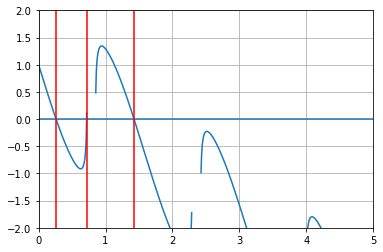

In [9]:
#Visualisation to help in finding the roots Omegai
par = np.linspace(-20,20,10000)
fig = plt.figure()
frame = fig.add_subplot(1,1,1)
frame.plot(par,func_root(par))
frame.set_xlim(0,5)
frame.set_ylim(-2,2)
frame.axhline(0)
for j in range(len(Omegas)):
    frame.axvline(Omegas[j],color='red')
frame.grid()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


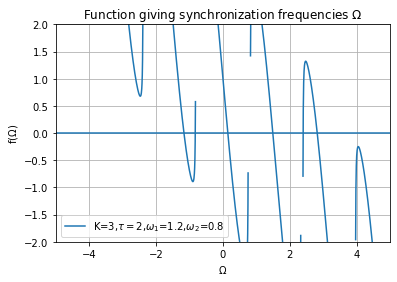

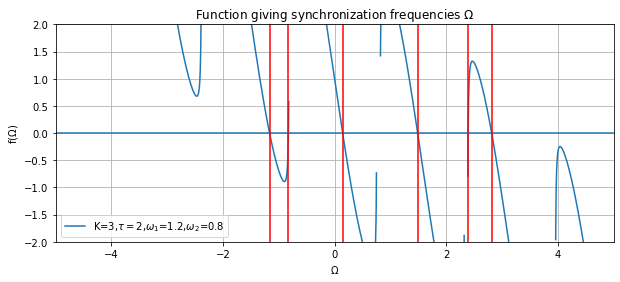

In [10]:
domega = omega1-omega2 #As defined in the paper
Kc = domega/2
baromega = (omega1+omega2)/2 #As defined in the paper
def func_root(Omega):
    return baromega - Omega - K * np.tan(Omega*tau)*(np.cos(Omega*tau)**2-(Kc/K)**2)**0.5
def alpha(Omega):
    if(np.cos(Omega*tau)>0):
        return np.arcsin(domega/(K*np.cos(Omega*tau)))
    else:
        return np.pi-np.arcsin(domega/(K*np.cos(Omega*tau)))
#Visualisation to help in finding the roots Omegai
par = np.linspace(-20,20,10000)
fig = plt.figure()
frame = fig.add_subplot(1,1,1)
frame.plot(par,func_root(par),label="K={},$\\tau={}$,$\omega_1$={},$\omega_2$={}".format(K,tau,omega1,omega2))
frame.set_xlim(-5,5)
frame.set_ylim(-2,2)
frame.axhline(0)
frame.set_xlabel("$\Omega$")
frame.set_ylabel("f($\Omega$)")
frame.set_title("Function giving synchronization frequencies $\Omega$")
frame.legend()
frame.grid()
Omegas = opt.fsolve(func_root,[-1.8,-0.83,2.2,2.5,2.4,3.2])
#Visualisation to help in finding the roots Omegai
par = np.linspace(-20,20,10000)
fig = plt.figure(figsize=(10,4))
frame = fig.add_subplot(1,1,1)
frame.plot(par,func_root(par),label="K={},$\\tau={}$,$\omega_1$={},$\omega_2$={}".format(K,tau,omega1,omega2))
frame.set_xlim(-5,5)
frame.set_ylim(-2,2)
frame.axhline(0)
for j in range(len(Omegas)):
    frame.axvline(Omegas[j],color='red')
frame.grid()
frame.set_xlabel("$\Omega$")
frame.set_ylabel("f($\Omega$)")
frame.set_title("Function giving synchronization frequencies $\Omega$")
frame.legend(loc='lower left')
fig.savefig("C:/Users/Grigore/Documents/NPP Assignment/FunctionOmega.png")

In [11]:
Omegas

array([-1.16518208, -0.82757026,  0.14488445,  1.4887792 ,  2.39390325,
        2.81530055])

In [29]:
K = 3
tau = 2
N=2
h = 0
D = 0 
omega1,omega2= rnd.uniform(0,2*np.pi,size=2)
omega1,omega2 = (1.2,0.8)
omegais = np.array([omega1,omega2])
theta0s=np.array([-0.1,2.5])

In [30]:
t1,y1 = integrate_euler(theta0s,omegais,t0=0,tf=30,dt=1e-3,tau=tau)
t1 = np.array(t1)

Using K = 3 N = 2



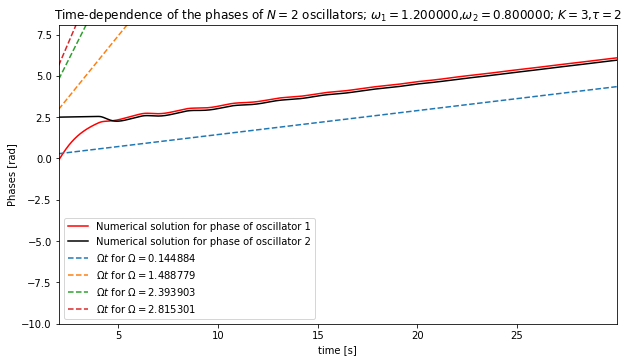

In [31]:
fig = plt.figure(figsize=(10,5.5))
frame = fig.add_subplot(1,1,1)
frame.plot(t1,y1[:,0],color='red',label="Numerical solution for phase of oscillator 1")
frame.plot(t1,y1[:,1],color='black',label="Numerical solution for phase of oscillator 2")
frame.set_xlabel("time [s]")
frame.set_ylabel("Phases [rad]")
frame.set_xlim(tau,max(t1))
frame.set_ylim(-10,y1.max()+2)
for j in range(len(Omegas)):
    if(Omegas[j]>0):
        frame.plot(t1,Omegas[j]*t1,linestyle='dashed',label="$\Omega t$ for $\Omega={:f}$".format(Omegas[j]))
frame.legend(loc="lower left")
frame.set_title("Time-dependence of the phases of $N={}$ oscillators; $\omega_1 = {:2f}$,$\omega_2={:1f}$; $K={}$,$\\tau={}$".format(N,omega1,omega2,K,tau))
fig.savefig("C:/Users/Grigore/Documents/NPP Assignment/PlotteddependenceN2-1.png")

In [24]:
omega1,omega2= rnd.uniform(0,2*np.pi,size=2)
print(omega1,omega2)

2.609573704118438 1.7480932315876572


Using K = 10 N = 2

Using K = 10 N = 2

Using K = 10 N = 2

Using K = 10 N = 2



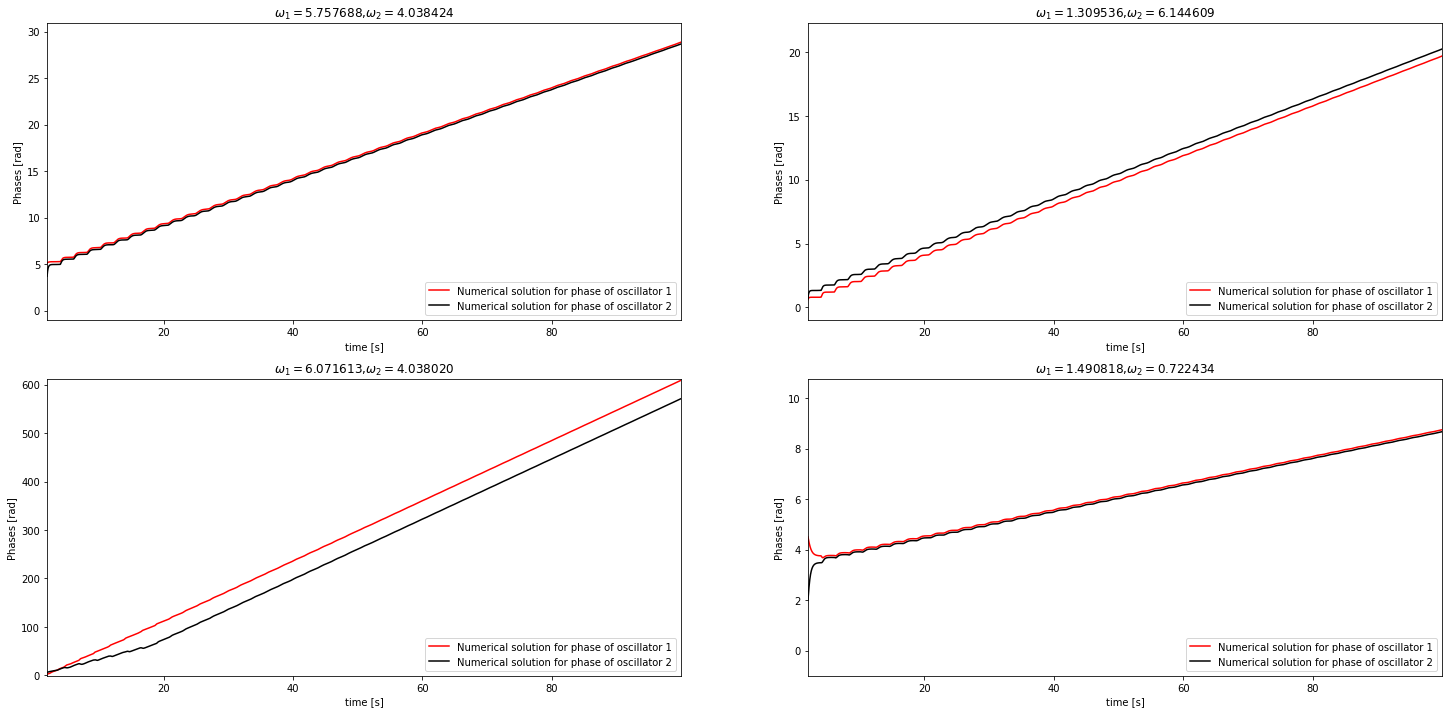

In [23]:
fig = plt.figure(figsize=(25,12))
for figno in range(4):
    omega1,omega2= rnd.uniform(0,2*np.pi,size=2)
    omegais = np.array([omega1,omega2])
    theta0s=rnd.uniform(0,2*np.pi,size=2)
    t1,y1 = integrate_euler(theta0s,omegais,t0=0,tf=100,dt=1e-3,tau=tau)
    t1 = np.array(t1)
    frame = fig.add_subplot(2,2,figno+1)
    frame.plot(t1,y1[:,0],color='red',label="Numerical solution for phase of oscillator 1")
    frame.plot(t1,y1[:,1],color='black',label="Numerical solution for phase of oscillator 2")
    frame.set_xlabel("time [s]")
    frame.set_ylabel("Phases [rad]")
    frame.set_xlim(tau,max(t1))
    frame.set_ylim(-1,y1.max()+2)
#for j in range(len(Omegas)):
#    if(Omegas[j]>0):
 #       frame.plot(t1,Omegas[j]*t1,linestyle='dashed',label="$\Omega t$ for $\Omega={:f}$".format(Omegas[j]))
    frame.legend(loc="lower right")
    frame.set_title("$\omega_1 = {:2f}$,$\omega_2={:1f}$".format(omega1,omega2))
fig.savefig("C:/Users/Grigore/Documents/NPP Assignment/MosaicN2.png")

(2, 99.99900000011354)

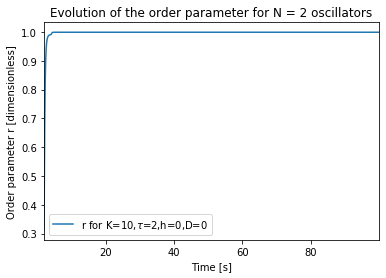

In [24]:
#See if the order parameter thing still makes sense
sols = y1
t=t1
averages = [np.average(sols[i]) for i in range(len(sols))]
ordparams = []
for i in range(len(sols)):
    ordparams.append((1/N)*sum(cmath.exp(1j*sols[i][k]) for k in range(N)))
rs = []
for i in range(len(ordparams)):
    rs.append(cmath.polar(ordparams[i])[0])
reals = [k.real for k in ordparams]
imgs = [k.imag for k in ordparams]
#Here we plot the evolution of the order parameter
fig = plt.figure()
frame = fig.add_subplot()
frame.plot(t,rs,label="r for K={},$\\tau$={},h={},D={}".format(K,tau,h,D))
frame.set_xlabel("Time [s]")
frame.set_ylabel("Order parameter r [dimensionless]")
frame.set_title("Evolution of the order parameter for N = {} oscillators".format(N))
frame.legend()
frame.set_xlim(tau,max(t1))

In [25]:
#### FOR N = 3 ####
K = 20
tau = 0.5
D = 0
h = 0
omega1,omega2,omega3 = (np.pi/4,np.pi/2,np.pi)
def a(alpha):
    return np.cos(alpha/2)-np.cos(alpha)
def b(alpha):
    return np.sin(alpha/2)+np.sin(alpha)
baromega = (omega1+omega2+omega3)/3
def g(alpha):
    return (4*K**2/9-((omega3-omega1)/b(alpha))**2)**0.5

def difference(alpha):
    return 1/tau * np.arcsin(3/(2*K)*g(alpha))  - (baromega-(np.cos(alpha)+2*np.cos(alpha/2))/3 * g(alpha))

alpha = np.linspace(-10,10,10000)
#fig = plt.figure()
##frame = fig.add_subplot(1,1,1)
#frame.plot(alpha,1/tau * np.arcsin(3/(2*K)*g(alpha)))
#frame.plot(alpha,baromega-(np.cos(alpha)+2*np.cos(alpha/2))/3 * g(alpha))

In [26]:
#b(alpha)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


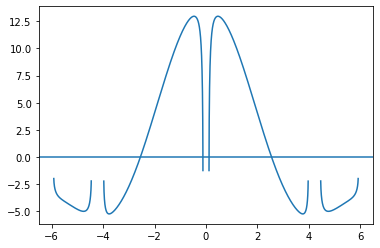

In [27]:
alpha = np.linspace(-2*np.pi-0.1,2*np.pi+0.1,10000)
fig = plt.figure()
frame = fig.add_subplot(1,1,1)
frame.plot(alpha,difference(alpha))
frame.axhline(0)

In [28]:
alphas = opt.root_scalar(difference,bracket=[-10,-5],method='brentq').root
alphas=[alphas]

ValueError: f(a) and f(b) must have different signs

In [ ]:
difference(-9)

In [371]:
alphas

[0.0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


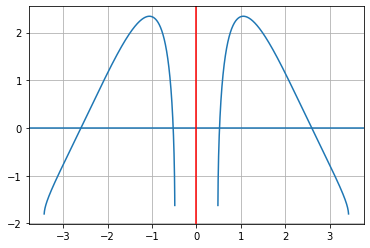

In [382]:
fig = plt.figure()
frame = fig.add_subplot(1,1,1)
frame.plot(alpha,difference(alpha))
frame.axhline(0)
for j in range(len(alphas)):
    frame.axvline(alphas[j],color='red')
frame.grid()

In [421]:
def Omega(alpha):
    return baromega - (np.cos(alpha)+2*np.cos(alpha/2))/3*g(alpha)

In [853]:
N=3
omega1,omega2,omega3 = rnd.uniform(0,2*np.pi,size=N)
omegais = np.array([omega1,omega2,omega3])
theta0s=np.array([-0.1,2.5,1.2])
D = 0
K=4
h = 0
tau=1
t1,y1 = integrate_euler(theta0s,omegais,t0=0,tf=50,dt=1e-3,tau=tau)
t1 = np.array(t1)

Using K = 4 N = 3



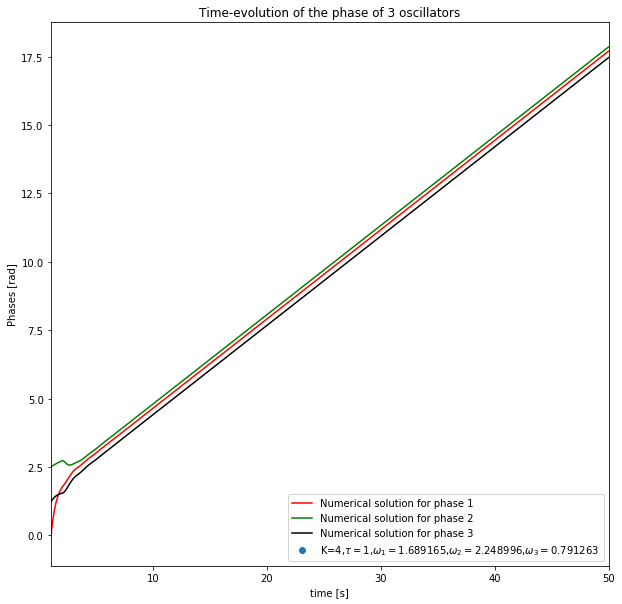

In [854]:
fig = plt.figure(figsize=(10,10))
frame = fig.add_subplot(1,1,1)
frame.plot(t1,y1[:,0],color='red',label="Numerical solution for phase 1")
frame.scatter(t1[0],y1[0,0],label="K={},$\\tau={}$,$\omega_1={:3f}$,$\omega_2={:3f}$,$\omega_3={:3f}$".format(K,tau,omega1,omega2,omega3))
frame.plot(t1,y1[:,1],color='green',label="Numerical solution for phase 2")
frame.plot(t1,y1[:,2],color='black',label="Numerical solution for phase 3")
frame.set_xlabel("time [s]")
frame.set_ylabel("Phases [rad]")
frame.set_xlim(tau,max(t1))
frame.legend(loc = 'lower right')
frame.set_title("Time-evolution of the phase of 3 oscillators")
fig.savefig("C:/Users/Grigore/Documents/NPP Assignment/N3Trials.png")


Using K = 4 N = 3

Using K = 4 N = 3

Using K = 4 N = 3

Using K = 4 N = 3



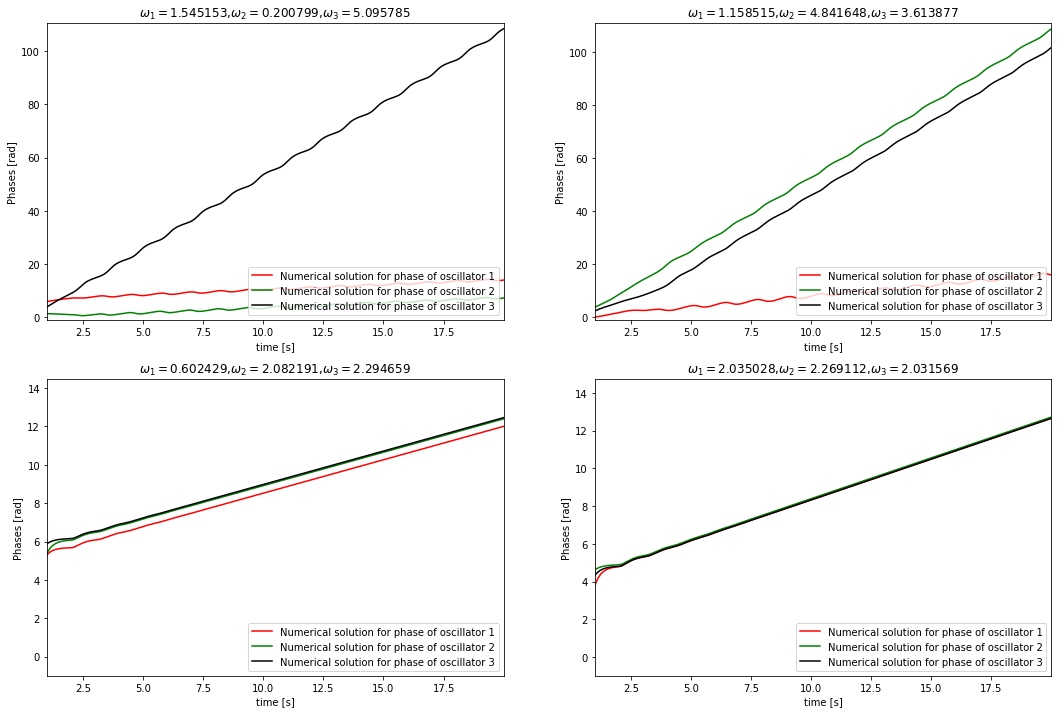

In [863]:
fig = plt.figure(figsize=(18,12))
for figno in range(4):
    N=3
    omega1,omega2,omega3 = rnd.uniform(0,2*np.pi,size=N)
    omegais = np.array([omega1,omega2,omega3])
    theta0s=rnd.uniform(0,2*np.pi,size=N)
    t1,y1 = integrate_euler(theta0s,omegais,t0=0,tf=20,dt=1e-3,tau=tau)
    t1 = np.array(t1)
    frame = fig.add_subplot(2,2,figno+1)
    frame.plot(t1,y1[:,0],color='red',label="Numerical solution for phase of oscillator 1")
    frame.plot(t1,y1[:,1],color='green',label="Numerical solution for phase of oscillator 2")
    frame.plot(t1,y1[:,2],color='black',label="Numerical solution for phase of oscillator 3")
    frame.set_xlabel("time [s]")
    frame.set_ylabel("Phases [rad]")
    frame.set_xlim(tau,max(t1))
    frame.set_ylim(-1,y1.max()+2)
#for j in range(len(Omegas)):
#    if(Omegas[j]>0):
 #       frame.plot(t1,Omegas[j]*t1,linestyle='dashed',label="$\Omega t$ for $\Omega={:f}$".format(Omegas[j]))
    frame.legend(loc="lower right")
    frame.set_title("$\omega_1 = {:2f}$,$\omega_2={:1f}$,$\omega_3={:1f}$".format(omega1,omega2,omega3))
fig.savefig("C:/Users/Grigore/Documents/NPP Assignment/MosaicN3.png")

(1, 19.99900000000146)

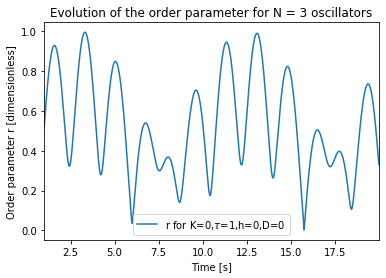

In [761]:
#See if the order parameter thing still makes sense
sols = y1
t=t1
averages = [np.average(sols[i]) for i in range(len(sols))]
ordparams = []
for i in range(len(sols)):
    ordparams.append((1/N)*sum(cmath.exp(1j*sols[i][k]) for k in range(N)))
rs = []
for i in range(len(ordparams)):
    rs.append(cmath.polar(ordparams[i])[0])
reals = [k.real for k in ordparams]
imgs = [k.imag for k in ordparams]
#Here we plot the evolution of the order parameter
fig = plt.figure()
frame = fig.add_subplot()
frame.plot(t,rs,label="r for K={},$\\tau$={},h={},D={}".format(K,tau,h,D))
frame.set_xlabel("Time [s]")
frame.set_ylabel("Order parameter r [dimensionless]")
frame.set_title("Evolution of the order parameter for N = {} oscillators".format(N))
frame.legend()
frame.set_xlim(tau,max(t1))